In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

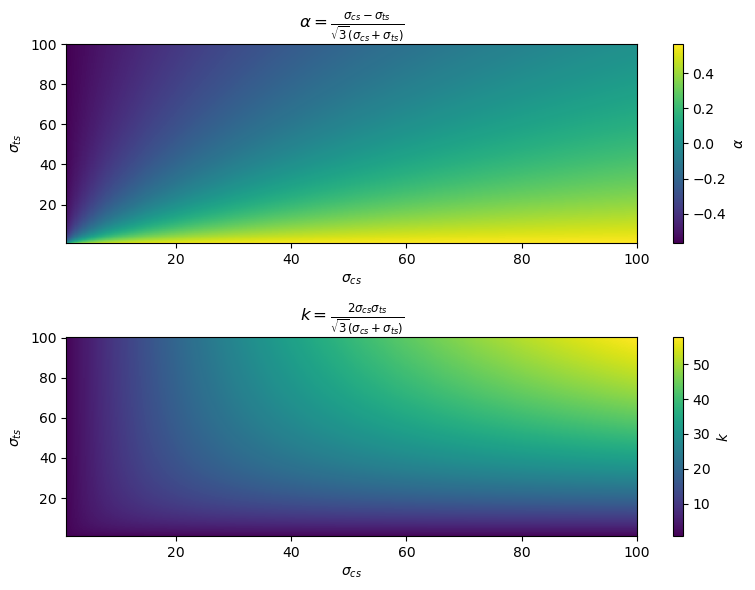

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(1, 100, 500)
sigma_ts = np.linspace(1, 100, 500)

# Create meshgrid
CS, ts = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
alpha = (CS - ts) / (np.sqrt(3) * (CS + ts))
k = (2 * CS * ts) / (np.sqrt(3) * (CS + ts))

# Plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

c0 = axs[0].pcolormesh(CS, ts, alpha, shading='auto', cmap='viridis')
fig.colorbar(c0, ax=axs[0], label=r'$\alpha$')

axs[0].set_xlabel(r'$\sigma_{cs}$')
axs[0].set_ylabel(r'$\sigma_{ts}$')
axs[0].set_title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

c1 = axs[1].pcolormesh(CS, ts, k, shading='auto', cmap='viridis')
fig.colorbar(c1, ax=axs[1], label=r'$k$')

axs[1].set_xlabel(r'$\sigma_{cs}$')
axs[1].set_ylabel(r'$\sigma_{ts}$')
axs[1].set_title(r'$k = \frac{2 \sigma_{cs} \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

plt.tight_layout()
plt.show()

$\alpha$ and $k$ as a function of $\theta$

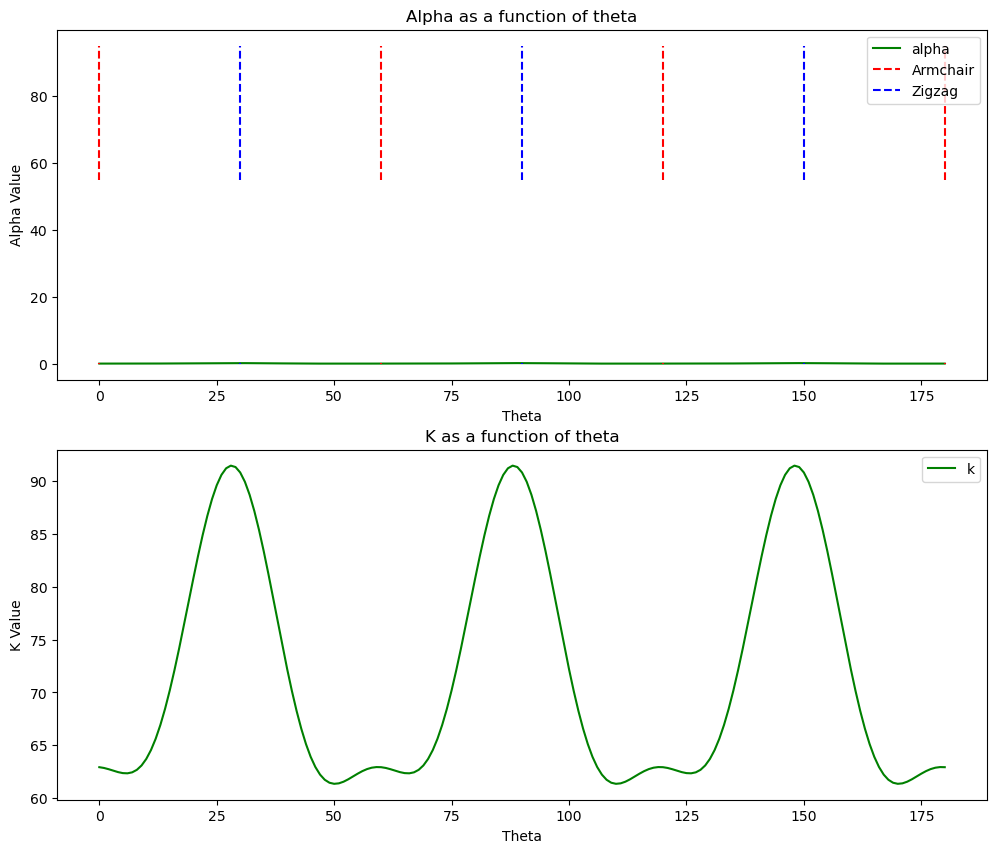

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("drucker_prager_params_thetas3D.csv")
def omega(theta):
    return 2 * np.pi * theta / 60

def alpha(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["a0"]
        + df["a1"] * np.cos(om)
        + df["a2"] * np.sin(om)
        + df["a3"] * np.cos(2 * om)
        + df["a4"] * np.sin(2 * om)
    )
    return val

def k(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["k0"]
        + df["k1"] * np.cos(om)
        + df["k2"] * np.sin(om)
        + df["k3"] * np.cos(2 * om)
        + df["k4"] * np.sin(2 * om)
    )
    return val

thetas = np.arange(0, 181, 1)
alphas = []
ks = []
for i in range(len(thetas)):
    alphas.append(alpha(i))
    ks.append(k(i))

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(thetas, alphas, color='green', label='alpha')
axs[0].plot([0, 0], [0, 0.22], '--', color='red', label='Armchair')
axs[0].plot([60, 60], [0, 0.22], '--', color='red')
axs[0].plot([120, 120], [0, 0.22], '--', color='red')
axs[0].plot([180, 180], [0, 0.22], '--', color='red')
axs[0].plot([30, 30], [0, 0.22], '--', color='blue', label='Zigzag')
axs[0].plot([90, 90], [0, 0.22], '--', color='blue')
axs[0].plot([150, 150], [0, 0.22], '--', color='blue')
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Alpha Value")
axs[0].set_title("Alpha as a function of theta")
axs[0].legend()

axs[1].plot(thetas, ks, color='green', label='k')
axs[1].plot([0, 0], [55, 95], '--', color='red', label='Armchair')
axs[1].plot([60, 60], [55, 95], '--', color='red')
axs[1].plot([120, 120], [55, 95], '--', color='red')
axs[1].plot([180, 180], [55, 95], '--', color='red')
axs[1].plot([30, 30], [55, 95], '--', color='blue', label='Zigzag')
axs[1].plot([90, 90], [55, 95], '--', color='blue')
axs[1].plot([150, 150], [55, 95], '--', color='blue')
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("K Value")
axs[1].set_title("K as a function of theta")
axs[1].legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

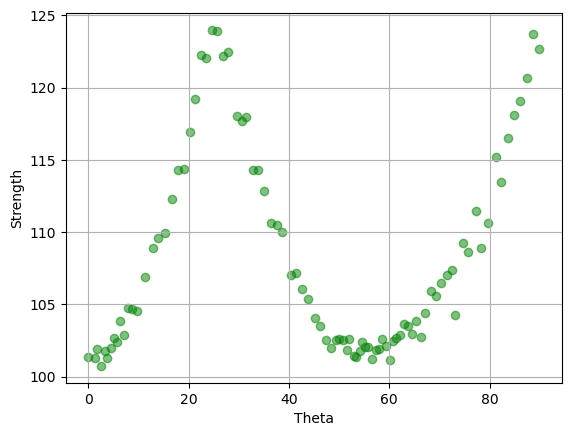

In [1]:
from filter_csv import filter_data
import local_config
import pandas as pd
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    "Defects": "None",  # will match NaN or "None"
    # "Defect Percentage": 0.5,
    # "Defect Random Seed": 3,
    # "Theta Requested": 0
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.001
}

range_filters = {
    # "Defect Percentage": (0.4, 0.6),
    # "Defect Random Seed": (0, 10)
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
}

or_filters = {
    # "Defect Type": ["SV", "DV"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, flip_strengths=False)

optimal_rows = []
for angle in range(0, 91, 1):
    this_df = filter_data(filtered_df, exact_filters={"Theta Requested": angle})
    
    if this_df.empty:
        continue  # skip if no data for this angle

    this_df = this_df.copy()
    this_df["ratio"] = this_df["Strength_2"] / this_df["Strength_1"]

    # Find the row with the minimum ratio
    min_row = this_df.loc[this_df["ratio"].idxmin()]

    # Append the row to the list
    optimal_rows.append(min_row)

# Combine all optimal rows into a single DataFrame
optimal_df = pd.DataFrame(optimal_rows)

# mirror across 90°: mirror(θ) = 180 - θ
# mirrored_df = optimal_df.copy()
# mirrored_df["Theta"] = 180 - mirrored_df["Theta"]
# final_df = pd.concat([optimal_df, mirrored_df], ignore_index=True)
final_df = optimal_df.copy()

# plt.scatter(result["Theta Requested"], result["Strength_1"], color='blue', alpha=0.5)
plt.scatter(final_df["Theta"], final_df["Strength_1"], color='green', alpha=0.5)

plt.xlabel("Theta")
plt.ylabel("Strength")
plt.grid()
plt.show


Here we pin the function at the peak and the valley

k0=108.746562, k1=-8.570924, k2=3.080257, k3=2.158931, k4=-1.384395


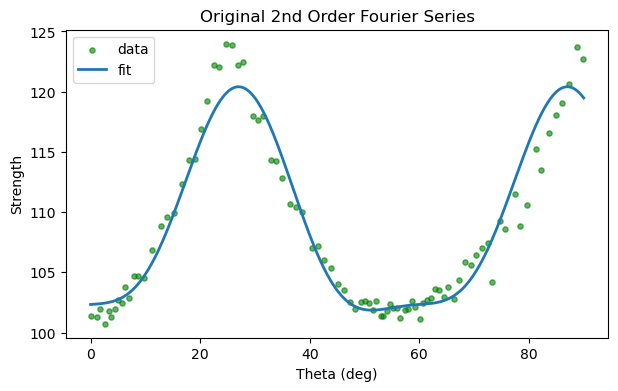

In [34]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()

theta_data = final_df["Theta"].to_numpy()
y_data = final_df["Strength_1"].to_numpy()

# define omega
def omega(theta_deg):
    return 2 * np.pi * theta_deg / 60.0

# model with constraint: k2 = 2*k4
def k_model(theta_deg, params):
    k0, k1, k2, k3, k4 = params   # t = k4
    # k2 = 2 * t
    # k4 = t
    w = omega(theta_deg)
    return (k0
            + k1 * np.cos(w)
            + k2 * np.sin(w)
            + k3 * np.cos(2 * w)
            + k4 * np.sin(2 * w))

# # Define centers for peaks and valleys
# peak_centers = np.array([30, 90, 150])
# valley_centers = np.array([0, 60, 120, 180])

# # Helper to find index of max/min near a center
# def find_nearby_index(theta_arr, y_arr, center, radius=5, mode="max"):
#     # Compute angular distance accounting for wraparound
#     dist = np.abs((theta_arr - center + 180) % 360 - 180)
#     mask = dist <= radius
#     if not np.any(mask):
#         return None
#     if mode == "max":
#         return np.argmax(y_arr[mask]) + np.where(mask)[0][0]
#     elif mode == "min":
#         return np.argmin(y_arr[mask]) + np.where(mask)[0][0]

# # Find pin indices
# pin_indices = []
# for center in peak_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="max")
#     if idx is not None:
#         pin_indices.append(idx)
# for center in valley_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="min")
#     if idx is not None:
#         pin_indices.append(idx)

# Loss function with pins

# pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_indices = []
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# def loss(params):
#     residuals = y_data - k_model(theta_data, params)
#     return np.sum(residuals**2)


# initial guess
x0 = [np.mean(y_data), 0.0, 0.0, 0.0, 0.0]

# fit using BFGS (same as your large-scale app)
result = minimize(loss, x0, method="Powell")

if result.success:
    k0, k1, k2, k3, k4 = result.x
    # k2 = 2 * t
    # k4 = t
    print(f"k0={k0:.6f}, k1={k1:.6f}, k2={k2:.6f}, k3={k3:.6f}, k4={k4:.6f}")
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 90, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, [k0, k1, k2, k3, k4]), label="fit", linewidth=2)
# plt.plot([25, 25], [100, 125])
# plt.plot(theta_grid, k_model(theta_grid, [110, -12.2, 0, 2.8, 0]), label="maybe", linewidth=2)

plt.title("Original 2nd Order Fourier Series")

plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.legend()
plt.show()


This is what we have now but up to 4th order harmonics. Does not get much better

[109.52999494  -3.89201505  -0.43329443   1.30577825   5.14076036
  -6.02387574   0.93751644  -1.30339182  -0.3430727   -1.38365412
  -0.95460617   1.19985564  -0.18948427   0.1355488    0.24503739
   1.12568837   0.66672497]


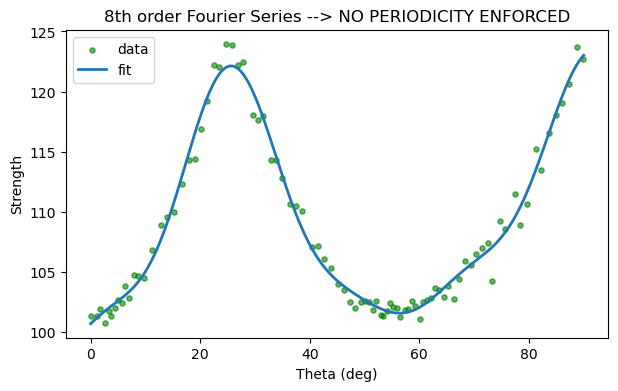

In [45]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

N = 8  # max harmonic order
x0 = np.zeros(2 * N + 1)  # initial guess


def k_model(theta_deg, params, N):
    """
    Generalized Fourier series up to order N.
    params: [k0, k1, k2, ..., k_{2N}]
        - k0: constant term
        - k_{2m-1}: cosine coefficient for m-th harmonic
        - k_{2m}: sine coefficient for m-th harmonic
    """
    # w = 2 * np.pi * theta_deg / 60.0  # 60° period
    w = 2 * np.pi * theta_deg / 180  # TO ENFORCE NO PERIODICITY
    k0 = params[0]
    total = np.full_like(theta_deg, k0, dtype=float)

    for m in range(1, N + 1):
        cos_coeff = params[2 * m - 1]
        sin_coeff = params[2 * m]
        total += cos_coeff * np.cos(m * w) + sin_coeff * np.sin(m * w)

    return total


# pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_indices = []
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params, N)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params, N) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# # loss = sum of squared residuals (same as in large-scale code)
# def loss(params):
#     residuals = y_data - k_model(theta_data, params, N)
#     return np.sum(residuals**2)

# fit using BFGS (same as your large-scale app) -- changed to powell
result = minimize(loss, x0, method="Powell")

if result.success:
    params_opt = result.x
    print(params_opt)
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 90, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, params_opt, N), label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title(f"{N}th order Fourier Series --> NO PERIODICITY ENFORCED")
plt.legend()
plt.show()


Spliced exponentials:

Fit successful:
a = 30.0849, b = 0.0452, c = 92.8698


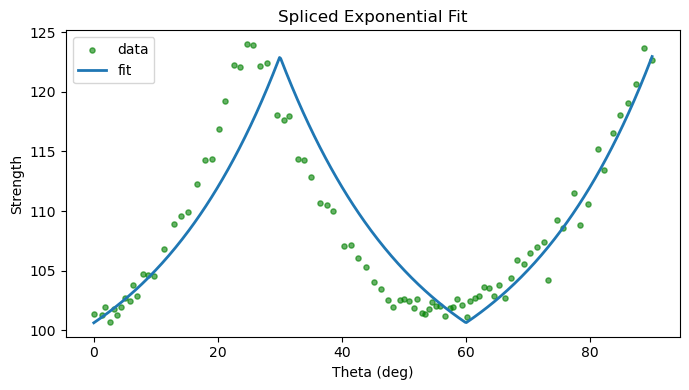

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

def spliced_exp(theta_deg, a, b, c):
    """
    Spliced exponential peaks at 30 and 90.
    Valley at 0 and 60. Segments:
    [0, 30]: rising exp
    [30, 60]: falling exp
    [60, 90]: rising exp
    """
    theta_deg = np.asarray(theta_deg)
    result = np.zeros_like(theta_deg, dtype=float)

    # First segment: [0, 30]
    mask1 = (theta_deg >= 0) & (theta_deg < 30)
    result[mask1] = a * np.exp(b * (theta_deg[mask1] - 30)) + c

    # Second segment: [30, 60]
    mask2 = (theta_deg >= 30) & (theta_deg < 60)
    result[mask2] = a * np.exp(-b * (theta_deg[mask2] - 30)) + c

    # Third segment: [60, 90]
    mask3 = (theta_deg >= 60) & (theta_deg <= 90)
    result[mask3] = a * np.exp(b * (theta_deg[mask3] - 90)) + c

    return result

# Loss function
def loss(params):
    a, b, c = params
    pred = spliced_exp(theta_data, a, b, c)
    return np.sum((y_data - pred) ** 2)

# Initial guess
a0 = np.max(y_data) - np.min(y_data)
b0 = 0.1
c0 = np.min(y_data)
x0 = [a0, b0, c0]

# Bounds
bounds = [(0, None), (1e-4, 10.0), (None, None)]

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, b, c = result.x
    print(f"Fit successful:\na = {a:.4f}, b = {b:.4f}, c = {c:.4f}")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 90, 500)
fit_curve = spliced_exp(theta_grid, a, b, c)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Spliced Exponential Fit")
plt.legend()
plt.tight_layout()
plt.show()


Spliced Quadratics:

Fit successful:
a = 21.5442, c = 102.0956, theta0 = 0.0001°


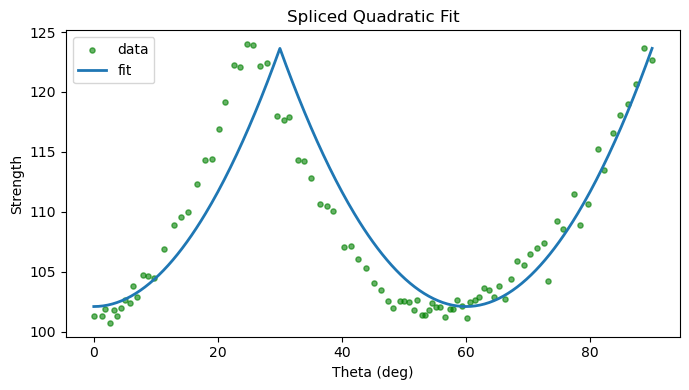

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

# Restrict to [0, 90]
mask = (theta_data >= 0) & (theta_data <= 90)
theta_data = theta_data[mask]
y_data = y_data[mask]

def wrapped_distance(theta, center):
    return (theta - center + 180) % 360 - 180

def spliced_valley_quad(theta_deg, a, c, theta0_deg):
    """
    Spliced quadratic valleys centered at 30 and 90 degrees.
    Each segment spans 60° and connects at 60°.
    """
    theta_deg = np.asarray(theta_deg)
    output = np.zeros_like(theta_deg, dtype=float)

    centers = [(theta0_deg + 60 * m) % 360 for m in range(2)]  # just [30, 90]

    for mu in centers:
        d = wrapped_distance(theta_deg, mu)
        mask = np.abs(d) <= 30
        output[mask] = a * (d[mask] / 30.0)**2 + c

    return output

# Loss function
def loss(params):
    a, c, theta0 = params
    pred = spliced_valley_quad(theta_data, a, c, theta0)
    residuals = y_data - pred
    return np.sum(residuals**2)

# Initial guess
a0 = 1.0
c0 = np.min(y_data)
theta0_0 = 0.0
x0 = [a0, c0, theta0_0]

# Bounds
bounds = [(0, None),     # a > 0
          (None, None),  # c free
          (0.0, 60.0)]   # theta0 in one period

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, c, theta0 = result.x
    print(f"Fit successful:\na = {a:.4f}, c = {c:.4f}, theta0 = {theta0:.4f}°")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 90, 361)
fit_curve = spliced_valley_quad(theta_grid, a, c, theta0)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Spliced Quadratic Fit")
plt.legend()
plt.tight_layout()
plt.show()


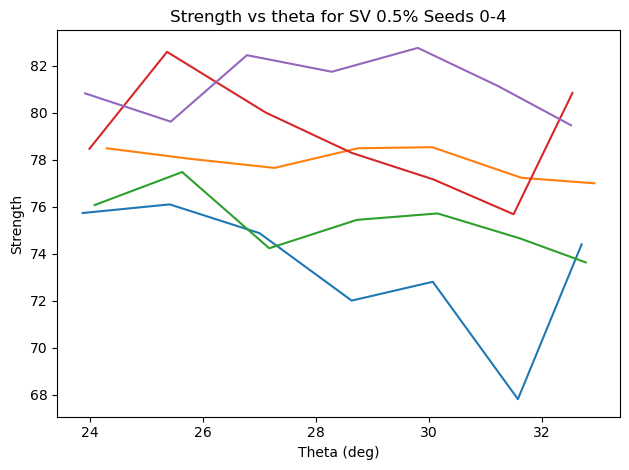

In [34]:
import pandas as pd
from filter_csv import filter_data
import local_config
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    # "Defects": "None",  # "{\"DV\": 0.25, \"SV\": 0.25}",  # will match NaN or "None"
    "Defects": "{\"SV\": 0.5}",
    # "Defect Random Seed": 0,
    # "Theta Requested": 90,
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.0
}

range_filters = {
    "Defect Random Seed": (0, 10),
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
    "Theta": (23, 33)
}

or_filters = {
    # "Defects": ["{\"DV\": 0.25, \"SV\": 0.25}", "{\"DV\": 0.5}", "{\"SV\": 0.5}"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, only_uniaxial=True, flip_strengths=False)

for seed in range(0, 5):
    this_sheet = filter_data(filtered_df, exact_filters={"Defect Random Seed": seed})
    plt.plot(this_sheet["Theta"], this_sheet["Strength_1"], label=seed)

# print(f"Filtered dataset is {len(filtered_df)} rows long.")

# plt.scatter(filtered_df["Strength_1"], filtered_df["Strength_2"], c=filtered_df["Theta"], alpha=0.7, cmap='rainbow')
# plt.colorbar()
# plt.scatter(filtered_df["Theta"], filtered_df["Strength_1"], s=14, alpha=0.6, label="data", c=(abs(filtered_df["Theta"] - filtered_df["Theta Requested"])))
# plt.scatter(filtered_df["Theta"], filtered_df["Strength_1"], s=14, alpha=0.6, label="data")

plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Strength vs theta for SV 0.5% Seeds 0-4")
# plt.colorbar()
# plt.legend()
plt.tight_layout()
plt.show()


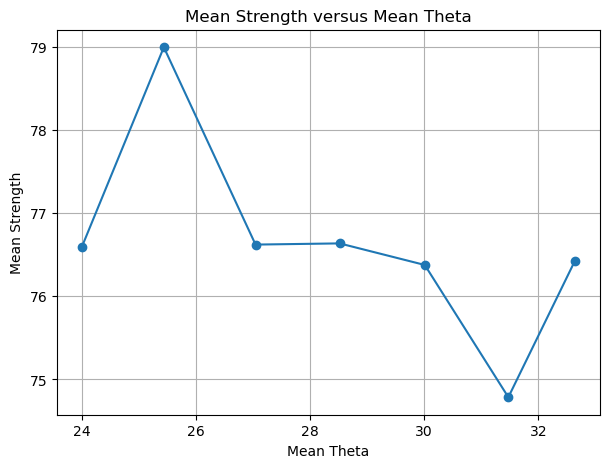

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

mini_df = (
    filtered_df.groupby("Theta Requested", as_index=False)
      .agg(mean_theta=("Theta", "mean"),
            mean_strength=("Strength_1", "mean"))
      [["mean_theta", "mean_strength"]]
      .sort_values("mean_theta")
      .reset_index(drop=True)
)

# 2) Plot: theta on x, mean strength on y
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(mini_df["mean_theta"], mini_df["mean_strength"], marker="o")
ax.set_xlabel("Mean Theta")
ax.set_ylabel("Mean Strength")
ax.set_title("Mean Strength versus Mean Theta")
ax.grid(True)
plt.show()

In [8]:
from scipy.linalg import polar
import numpy as np


F = np.array([[1.119, 0.177, 0], [0, 1.047, 0], [0, 0, 1]])

R, U = polar(F, side='right')

print("U:\n", U)

print("\nR:\n", R)

print("\nR.T @ R:\n", R.T @ R)

print("\ndet(R):", np.linalg.det(R))

print("Angle =", np.degrees(np.arctan2(R[1, 0], R[0, 0])))

U:
 [[1.11528241 0.09113804 0.        ]
 [0.09113804 1.05793755 0.        ]
 [0.         0.         1.        ]]

R:
 [[ 0.99667776  0.08144597  0.        ]
 [-0.08144597  0.99667776  0.        ]
 [ 0.          0.          1.        ]]

R.T @ R:
 [[1.00000000e+00 3.56673573e-17 0.00000000e+00]
 [3.56673573e-17 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

det(R): 1.0
Angle = -4.671684769432277


In [34]:
F = np.array([[1.119, 0.177, 0], [0, 1.047, 0], [0, 0, 1]])

C = F.T @ F

vals2, vecs = np.linalg.eigh(C)

print("C:\n", C)
print("\nEigenvalues squared with their eigenvectors:")

# vecs[:, 0] = vecs[:, 0] / -0.8062578
# vecs[:, 2] = vecs[:, 2] / -0.59156433

for i in range(3):
    print(vals2[i], vecs[:, i])


vals = np.sqrt(vals2)
print("\nEigenvalues:", vals)

U = np.zeros((3, 3))

for i in range(3):
    M = np.zeros((3, 3))
    for j in range(3):
        for k in range(3):
            M[j, k] = vecs[j, i] * vecs[k, i]
    print(i, '\n', M)
    U += (vals[i] * M)

u_inv = np.linalg.inv(U)
R = F @ u_inv
print("\nU:\n", U)

print("\nR:\n", R)

print("\nR.T @ R:\n", R.T @ R)

print("\ndet(R):", np.linalg.det(R))

print("Angle =", np.degrees(np.arctan2(R[1, 0], R[0, 0])))

C:
 [[1.252161 0.198063 0.      ]
 [0.198063 1.127538 0.      ]
 [0.       0.       1.      ]]

Eigenvalues squared with their eigenvectors:
0.9822159887325506 [ 0.59156433 -0.8062578   0.        ]
1.0 [0. 0. 1.]
1.3974830112674494 [-0.8062578  -0.59156433 -0.        ]

Eigenvalues: [0.9910681  1.         1.18215186]
0 
 [[ 0.34994835 -0.47695336  0.        ]
 [-0.47695336  0.65005165 -0.        ]
 [ 0.         -0.          0.        ]]
1 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
2 
 [[0.65005165 0.47695336 0.        ]
 [0.47695336 0.34994835 0.        ]
 [0.         0.         0.        ]]

U:
 [[1.11528241 0.09113804 0.        ]
 [0.09113804 1.05793755 0.        ]
 [0.         0.         1.        ]]

R:
 [[ 0.99667776  0.08144597  0.        ]
 [-0.08144597  0.99667776  0.        ]
 [ 0.          0.          1.        ]]

R.T @ R:
 [[ 1.00000000e+00 -4.27177951e-17  0.00000000e+00]
 [-4.27177951e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

de

In [42]:
import numpy as np
import pandas as pd
from scipy.linalg import polar
import local_config
import warnings

ts = 5e-4  # timestep (set TS=1.0 if 'Fracture Time' is already in seconds)

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

def rotation_from_row(row, tol=1e-10):
    """
    Compute lattice rotation (deg) at fracture from engineering rates x time.
    Warn if R^T R != I or det(R) != 1 beyond tolerance.
    """
    # total engineering strains at fracture
    ex = row['Strain Rate x']  * row['Fracture Time'] * ts
    ey = row['Strain Rate y']  * row['Fracture Time'] * ts
    ez = row['Strain Rate z']  * row['Fracture Time'] * ts
    gxy = row['Strain Rate xy'] * row['Fracture Time'] * ts
    gxz = row['Strain Rate xz'] * row['Fracture Time'] * ts
    gyz = row['Strain Rate yz'] * row['Fracture Time'] * ts

    # Deformation gradient (engineering form)
    F = np.array([[1.0 + ex, gxy, gxz], [0.0, 1.0 + ey, gyz], [0.0, 0.0, 1 + ez]], dtype=float)

    # Right polar: F = R @ U
    R, U = polar(F, side='right')

    # Checks (orthogonality & determinant)
    orth_err = np.linalg.norm(R.T @ R - np.eye(3))
    detR = np.linalg.det(R)

    if orth_err > tol or abs(detR - 1.0) > tol:
        warnings.warn(
            f"Row {row.name}: rotation check failed "
            f"(||R^T R - I||_F={orth_err:.2e}, det(R)={detR:.12f}).",
            RuntimeWarning
        )

    # Lattice rotation angle (deg) from first column of R
    phi_deg = np.degrees(np.arctan2(R[1, 0], R[0, 0]))  # this is purely in the xy plane.

    # Optionally compute effective angle if your CSV has it
    out = {'phi_deg': phi_deg}

    return pd.Series(out)

# Compute the angle per-row and name the series
rotation_series = df.apply(rotation_from_row, axis=1)
rotation_series.name = 'Rotation Angle'

# Attach and place the column between 'Theta' and 'Defects'
df['Rotation Angle'] = rotation_series
cols = list(df.columns)
if 'Theta' in cols and 'Defects' in cols:
    # remove then reinsert between Theta and Defects
    cols.remove('Rotation Angle')
    i_theta = cols.index('Theta')
    i_def   = cols.index('Defects')
    insert_pos = i_theta + 1 if i_theta < i_def else i_def
    cols.insert(insert_pos, 'Rotation Angle')
    df = df.reindex(columns=cols)

# Save if useful
df.to_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations_2.csv", index=False)

print(df.head())



   Simulation ID  Num Atoms x  Num Atoms y  Strength_1  Strength_2  \
0              1           60           60   93.266745   92.945400   
1              2           60           60   97.965450   58.287006   
2              3           60           60  100.996479   14.921239   
3              4           60           60  101.111180   27.533721   
4              5           60           60   99.503818   38.658010   

   Strength_3  CritStrain_1  CritStrain_2  CritStrain_3  Strain Rate x  ...  \
0   -0.007768        0.1285       0.12850           0.0          0.001  ...   
1   -0.004113        0.1310       0.06550           0.0          0.001  ...   
2   -0.017434        0.1320       0.01320           0.0          0.001  ...   
3   -0.030010        0.1340       0.02680           0.0          0.001  ...   
4    0.017092        0.1315       0.03945           0.0          0.001  ...   

   Max Sim Length  Output Timesteps  Fracture Window  Theta Requested  \
0        10000000              